<a href="https://colab.research.google.com/github/brunobro/aproximacao-de-series-temporais-com-polinomio-de-chebyshev/blob/main/MI_AproxPolChebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aproximação de séries temporais com polinômio de Chebyshev**

Neste vídeo-tutorial aprenderemos como utilizar polinômios de Chebyshev para aproximar séries temporais

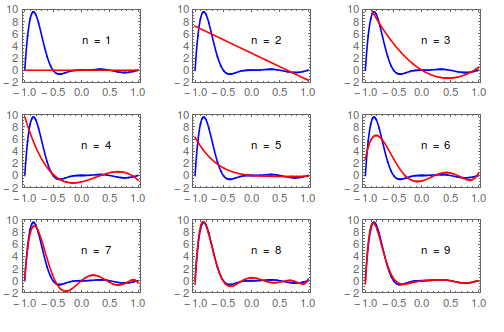

**Neste vídeo-tutorial aprenderemos**

<u>Teoria:</u>
*   Relação recursiva dos polinômios de Chebyshev
*   Séries de Chebyshev
*   Mínimos Quadrados com Séries de Chebyshev

<u>Aplicações:</u>
* Tendência de uma série temporal (Emissões de CO2 na atmosfera)
* Aproximação de baixa e alta ordem
* Aproximação por partes
* Remoção de ruído de Eletrocardiograma



Os **polinômios de Chebyshev** de primeira ordem são dados recursivamente por

$$
T_0 (x) = 1
$$

$$
T_1 (x) = x
$$

$$
T_{n+1} (x) = 2xT_{n}(x) - T_{n-1}(x)
$$

eles são definidos no intervalo $[-1, 1]$.

Vejamos os três seguintes polinômios de Chebyshev
$$
T_2 (x) = 2x^2 - 1
$$

$$
T_3 (x) = 4x^3 - 3x
$$

$$
T_4 (x) = 8x^4 - 8x^2 + 1
$$

Assim, podemos formar uma <u>série de Chebyshev</u> fazendo

$$
f(x) = a_0 T_0(x) + a_1 T_1(x) + ⋯
$$

Vejamos alguns exemplo em Python

In [1]:
#Importa os módulos necessários
import numpy as np
import matplotlib.pyplot as plt

A biblioteca numpy disponibiliza o método 

`np.polynomial.Chebyshev(coef, domain=[-1,1])`

Este recebe os coeficientes "coef", em ordem crescente, dos polinôminos $T_n(x)$ e retorna uma combinação linear destes.

<u>Por exemplo:</u> np.polynomial.Chebyshev((a, b, c)) retornará
$aT_0(x) + b T_1(x) + c T_2(x)$ no domínio $[-1,1]$.

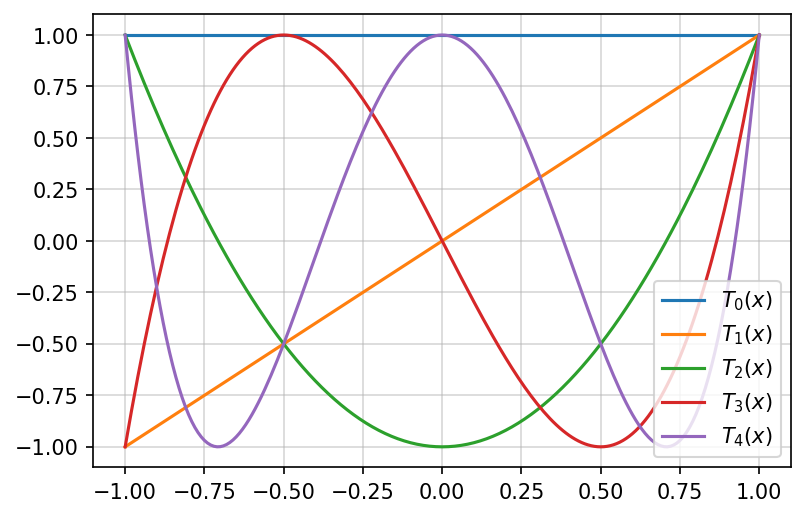

In [2]:
#Mostra os cinco primeiros polinômios no domínio [-1, 1]

#Intervalo [-1, 1]
x = np.arange(-1, 1.01, 0.01)

#Constroi os polinômios
T0 = np.polynomial.Chebyshev((1))
T1 = np.polynomial.Chebyshev((0, 1))
T2 = np.polynomial.Chebyshev((0, 0, 1))
T3 = np.polynomial.Chebyshev((0, 0, 0, 1))
T4 = np.polynomial.Chebyshev((0, 0, 0, 0, 1))

#Plota o gráfico
plt.figure(dpi=150)
plt.plot(x, T0(x), label='$T_0(x)$')
plt.plot(x, T1(x), label='$T_1(x)$')
plt.plot(x, T2(x), label='$T_2(x)$')
plt.plot(x, T3(x), label='$T_3(x)$')
plt.plot(x, T4(x), label='$T_4(x)$')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

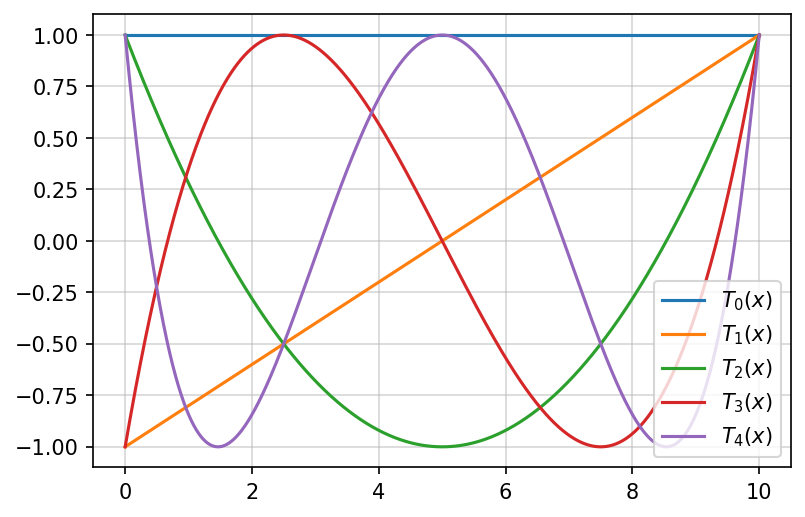

In [3]:
#Mostra os cinco primeiros polinômios no domínio [0, 10]

#Intervalo [0, 10]
I = [0, 10]
x = np.arange(I[0], I[1] + 0.01, 0.01)

#Constroi os polinômios
T0 = np.polynomial.Chebyshev((1), I)
T1 = np.polynomial.Chebyshev((0, 1), I)
T2 = np.polynomial.Chebyshev((0, 0, 1), I)
T3 = np.polynomial.Chebyshev((0, 0, 0, 1), I)
T4 = np.polynomial.Chebyshev((0, 0, 0, 0, 1), I)

#Plota o gráfico
plt.figure(dpi=150)
plt.plot(x, T0(x), label='$T_0(x)$')
plt.plot(x, T1(x), label='$T_1(x)$')
plt.plot(x, T2(x), label='$T_2(x)$')
plt.plot(x, T3(x), label='$T_3(x)$')
plt.plot(x, T4(x), label='$T_4(x)$')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

**Forma trigonométrica**

Um sua forma trigonométrica os polinômios de Chebyshev podem ser obtidos assim:

$$
T_n (x) = \cos(n \arccos(x)), ~ n=0,1,2,...
$$

$$
T_{n+1} (x) + T_{n-1} (x) = 2 \cos[n \arccos(x)] \cos[\arccos(x)]
$$


Obs: O domínio da função $\arccos(x)$ é $x \in [-1,1]$.

Os zeros dos polinômios de Chebyshev são dados por

$$
x_i = \cos \left( \pi\frac{2i - 1}{2N}\right), ~ i=1,...,N
$$

onde $N$ é o grau (ordem) do polinômio.

<u>Exemplos:</u>
* $T_0(x)$ tem raiz em $x_0 = \cos \left( \pi\frac{2 \cdot 0 - 1}{2}\right) = 0$

* $T_1(x)$ tem raiz em $x_1 = \cos \left( \pi\frac{2 \cdot 1 - 1}{2 \cdot 2}\right) = \pm \sqrt{2}/2$

 **Ortogonalidade dos Polinômios de Chebyshev**

Os Polinômios de Chebyshev são ortogonais em relação a função de ponderação

$$
w(x) = \dfrac{1}{\sqrt{1 - x^2}}
$$

no intervalo $[-1, 1]$. Isto é:

$$
\int_{-1}^{1} \dfrac{T_m(x) T_n(x) }{\sqrt{1 - x^2}} \textrm{d}x = \left\lbrace 
		\begin{array}{rl}
			0, & \textrm{ se } m \neq n\\
			\frac{\pi}{2}, & \textrm{ se } m = n \neq 0\\
            \pi, & \textrm{ se } m = n = 0\\
		\end{array}
		\right.
$$

<u>Por exemplo:</u>

$$
\int_{-1}^{1} \dfrac{T_0(x) T_1(x) }{\sqrt{1 - x^2}} \textrm{d}x = \int_{-1}^{1} \dfrac{x}{\sqrt{1 - x^2}} \textrm{d}x = \left[- \sqrt{1 - x^2} \right]_{-1}^{1} = 0
$$

 **Aproximação por Polinômio de Chebyshev**

Algoritimo para aproximação por mínimos quadrados com polinômios ortogonais

<u>Entradas:</u>
*   $f(x)$: função contínua definida em $[-1,1]$
*   $w(x)$: função de ponderação
*   $\lbrace{T_{k}(x)\rbrace}_{k=0}^{n}$: polinômios de Chebyshev (base ortogonal)

<u>Saída:</u>
* São os coeficientes $a_0 , a_1 , \cdots, a_n$ que minimizam a integral


$$
\int_{-1}^{1} w(x) [f(x) - a_0 T_{0}(x) - a_1 T_{1}(x) - \cdots - a_n T_{n}(x)]^2 \textrm{d}x
$$

<u>Algoritmo</u>

Para $k=1, \cdots, n$ faça:

$$
a_k = \frac{2}{\pi}\int_{-1}^{1} \frac{f(x) T_{k}(x) \textrm{d}x}{\sqrt{1 - x^2}}
$$

$$
a_0 = \frac{1}{\pi}\int_{-1}^{1} \frac{f(x) \textrm{d}x}{\sqrt{1 - x^2}}
$$

<u>Fim</u>

A aplicação do algoritmo resulta na função aproximada 

$$
\tilde{f}(x) = a_0 T_{0}(x) + a_1 T_{1}(x) + \cdots + a_n T_{n}(x) = \sum_{i=0}^{n} a_i T_{i}(x)
$$
com $x \in [-1, 1]$.

# Exemplos de Aplicação

**Aproximação da série temporal de emissão de CO2 da atmosfera**

Link: https://www.kaggle.com/datasets/saurav9786/time-series-data?select=Emission.csv

In [12]:
import pandas as pd

#Lê a serie de emissão de CO2
df = pd.read_csv('Emission.csv')
print(df.head(20))

SERIE = df['CO2 Emission']

    Year Month  CO2 Emission
0   1973   Jan       106.363
1   1973   Feb       101.760
2   1973   Mar       110.553
3   1973   Apr       104.734
4   1973   May       114.897
5   1973   Jun       109.240
6   1973   Jul       112.139
7   1973   Aug       116.683
8   1973   Sep       106.558
9   1973   Oct       111.655
10  1973   Nov       112.111
11  1973   Dec       108.505
12  1974   Jan       101.702
13  1974   Feb        94.699
14  1974   Mar       104.722
15  1974   Apr       103.963
16  1974   May       110.262
17  1974   Jun       108.271
18  1974   Jul       111.896
19  1974   Aug       113.590


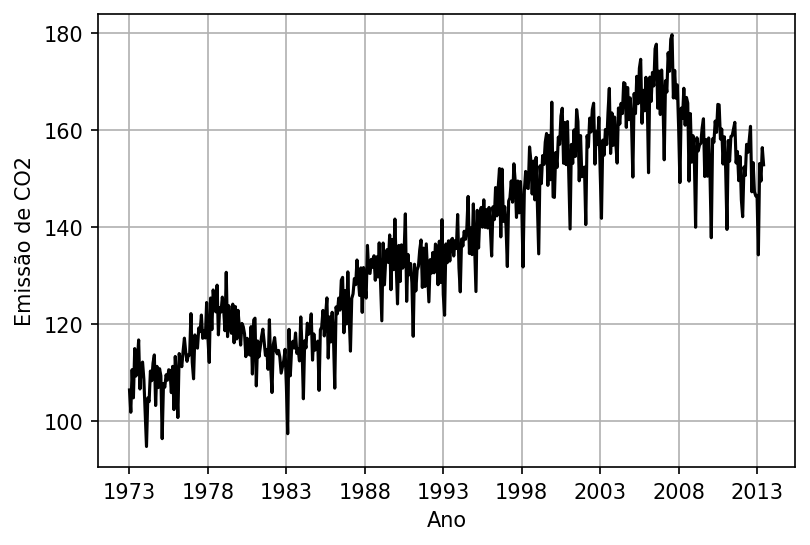

In [5]:
'''
Plota a série temporal
'''

#Indexa a série a cada p anos
p    = 5
ind  = np.arange(0, len(SERIE), p * 12)
year = df['Year'][ind]

#Plota a figura indexada
plt.figure(dpi=150)
plt.plot(SERIE, c='k')
plt.xticks(ind, year)
plt.xlabel('Ano')
plt.ylabel('Emissão de CO2')
plt.grid()
plt.show()

**Obtenção da tendência da série de C02 (Aproximação de baixa ordem)**

Para tanto podemos empregar uma aproximação por polinômios de Chebyshev de ordem baixa. Assim utilizaremos os polinômios com "menos ondulações".


Série Chebyshev:
135.2941649565078 + 27.215020189514224·T₁(x) - 4.342030153028431·T₂(x) -
6.906993090701803·T₃(x) - 4.064781258325257·T₄(x) +
0.850657481021264·T₅(x) + 0.5272271173979999·T₆(x) +
1.133059761742798·T₇(x) + 1.9415283327092303·T₈(x) -
1.6443396313570218·T₉(x) + 0.2646787505953591·T₁₀(x) +
0.600112278538001·T₁₁(x) - 2.4984054622227374·T₁₂(x) +
1.2709918827399824·T₁₃(x) + 0.8761722279660861·T₁₄(x) +
0.9720855488659847·T₁₅(x)


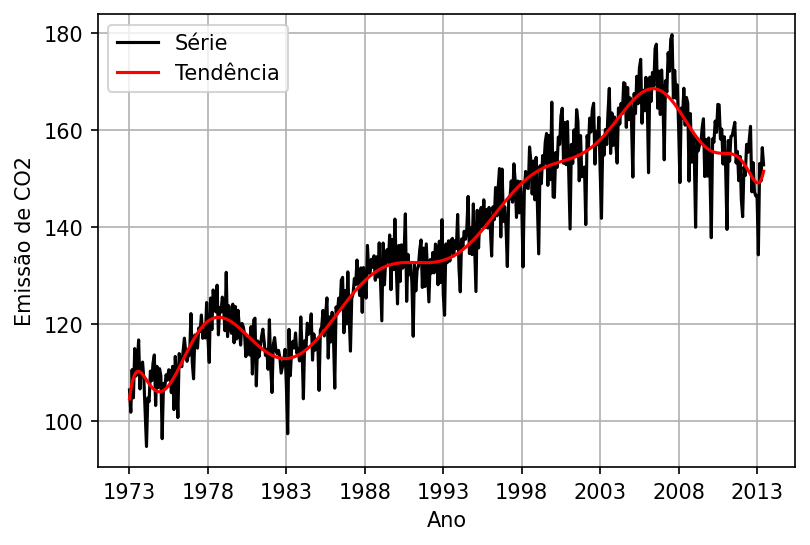

In [15]:
'''
Aproximação de baixa ordem: Obtenção da tendência da série
'''

#Pontos da série utilizados no ajuste
x = np.arange(0, len(SERIE))

#Faz o ajuste polinomial
order     = 15
Cheby_pol = np.polynomial.Chebyshev.fit(x, SERIE, order)

print('\nSérie Chebyshev:')
print(Cheby_pol)

#Avaliação da série de Chebyshev nos pontos amostrados
aval = Cheby_pol(x)

#Compara a série com a aproximação (tendência)
plt.figure(dpi=150)
plt.plot(SERIE, label='Série', c='k')
plt.plot(aval, label='Tendência', c='r')
plt.xticks(ind, year)
plt.xlabel('Ano')
plt.ylabel('Emissão de CO2')
plt.grid()
plt.legend()
plt.show()

**Aproximação da série de C02 (Aproximação de alta ordem)**

Neste caso empregamos uma aproximação por polinômios de Chebyshev de ordem alta.


Série Chebyshev:
135.2832443955999 + 27.34806611065089·T₁(x) - 4.361669191853471·T₂(x) -
6.771809278779236·T₃(x) - 4.077600692080375·T₄(x) +
0.9903963533632135·T₅(x) + 0.5265714221649559·T₆(x) +
1.2804254186888995·T₇(x) + 1.9599609631351407·T₈(x) -
1.4849790233887683·T₉(x) + 0.3125451991865974·T₁₀(x) +
0.7784814528997454·T₁₁(x) - 2.402185481246724·T₁₂(x) +
1.481628598387161·T₁₃(x) + 1.0694531585142193·T₁₄(x) +
1.2486927437156503·T₁₅(x) + 0.5903183094112062·T₁₆(x) +
0.545951789650498·T₁₇(x) - 0.30243095726071634·T₁₈(x) -
0.23488733223286085·T₁₉(x) - 0.5164873025934·T₂₀(x) +
0.8592994784546898·T₂₁(x) + 0.31102225141878237·T₂₂(x) +
0.15396645716379267·T₂₃(x) + 0.5568355991331236·T₂₄(x) +
0.3040149687236595·T₂₅(x) + 0.3390745134765488·T₂₆(x) -
0.6498493876824373·T₂₇(x) - 0.33920146454984484·T₂₈(x) -
1.149222162513953·T₂₉(x) - 0.25457532925796345·T₃₀(x) -
0.7708134892849913·T₃₁(x) + 0.1746921478994336·T₃₂(x) -
0.8846947555247556·T₃₃(x) - 0.37043515112479386·T₃₄(x) -
0.4835713747857704·T₃₅(

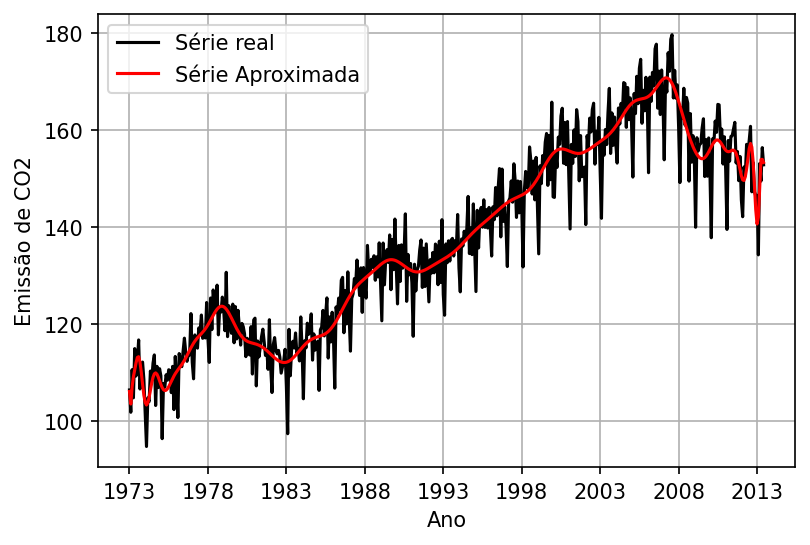

In [22]:
'''
Aproximação de alta ordem
'''

#Pontos da série utilizados no ajuste
x = np.arange(0, len(SERIE))

#Faz o ajuste polinomial
order     = 50
Cheby_pol, L = np.polynomial.Chebyshev.fit(x, SERIE, order, full=True)

print('\nSérie Chebyshev:')
print(Cheby_pol)

#print('\nResíduo: %.4f' %L[0][0])

#Avaliação da série de Chebyshev nos pontos amostrados
aval = Cheby_pol(x)

#Compara a série com a aproximação (tendência)
plt.figure(dpi=150)
plt.plot(SERIE, label='Série real', c='k')
plt.plot(aval, label='Série Aproximada', c='r')
plt.xticks(ind, year)
plt.xlabel('Ano')
plt.ylabel('Emissão de CO2')
plt.grid()
plt.legend()
plt.show()

**Aproximação por partes**

1. Divida a série em janelas (segmentos) de mesmo tamanho
2. Faça a aproximação para cada segmento
3. Concatene os segmentos aproximados

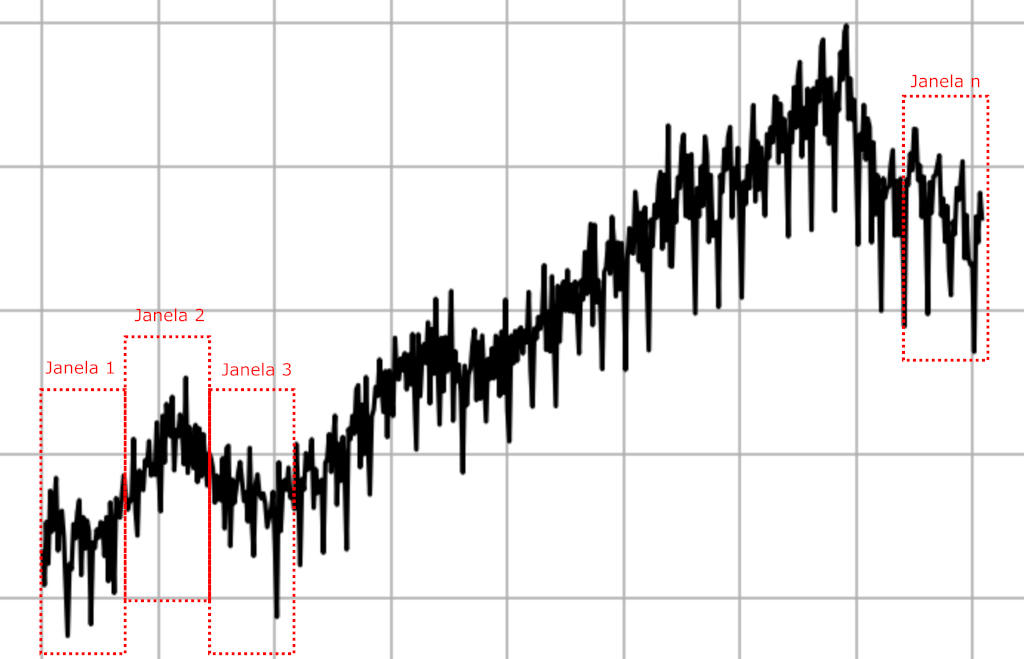

In [8]:
def fit_part(serie, window, order, samples_add = 200):
    '''
    serie: série temporal
    window: tamanho dos segmentos (janelas)
    order: ordem da série de Chebyshev
    '''

    #Espelha as borda direita da série para evitar retornar uma série menor
    N  = len(serie)
    br = serie[N - samples_add:N]

    #Acrescenta a borda espelhada à série
    serie_inc = np.concatenate((serie, br[::-1]))

    #Armazena a série ajustada
    new_serie = []

    #Quantidade de segmentos
    segs = int(len(serie_inc)/window)

    s = 0   #início do segmento
    e = window #fim do segmento
    x = np.arange(0, window)

    for i in range(0, segs):
       
        #Obtém o segmento
        seg_fit = serie_inc[s:e]

        #Caso não haja amostras suficientes na última janela
        if len(seg_fit) < window:
            break

        #Faz o ajuste
        Cheby_pol = np.polynomial.Chebyshev.fit(x, seg_fit, order)

        #Concatena o segmento ajustado
        new_serie = new_serie + list(Cheby_pol(x))

        #Passa para o próximo segmento
        s = e
        e = s + window

    #Retorna a série ajustada, descartando as amostras inseridas na borda
    #E calcula o resíduo
    new_serie = new_serie[:N]
    error     = np.sum(np.abs(serie - new_serie))

    return new_serie, error

Resíduo: 1131.4415


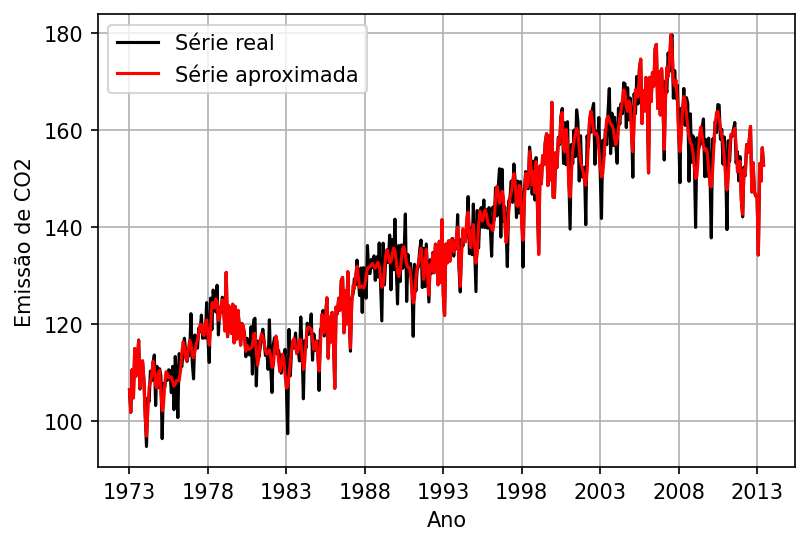

In [21]:
'''
Aplica uma aproximação por partes
'''
window = 80
order  = 50

NEW_SERIE, ERROR = fit_part(SERIE, window, order)

print('Resíduo: %.4f' %ERROR)

#Compara a série com a aproximação (tendência)
plt.figure(dpi=150)
plt.plot(SERIE, label='Série real', c='k')
plt.plot(NEW_SERIE, label='Série aproximada', c='r')
plt.xticks(ind, year)
plt.xlabel('Ano')
plt.ylabel('Emissão de CO2')
plt.grid()
plt.legend()
plt.show()

**Regressão linear por partes**

Escolher um período e a ordem 1 para a série de Chebyshev.


Erro: 148.2279


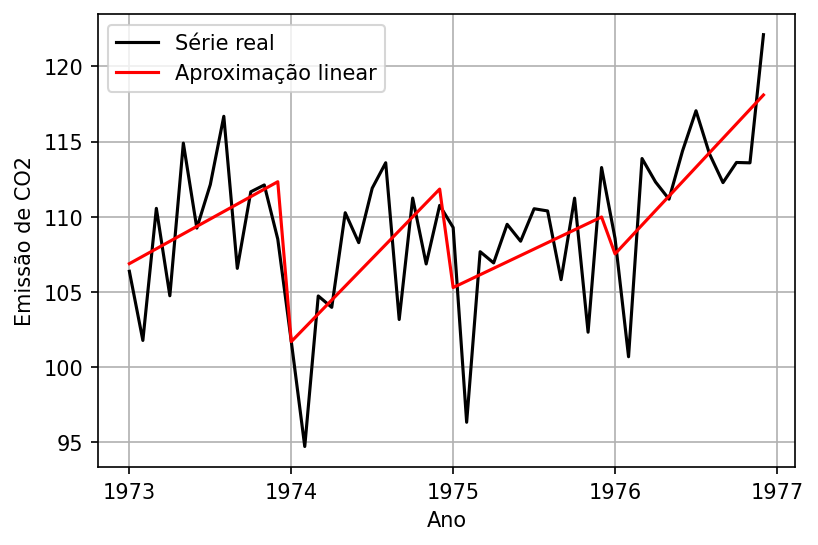

In [25]:
'''
Aplica um tipo de regressão linear por partes
'''

#Toma os primeiros 48 meses da série para melhor visualização
SERIE_SEG = SERIE[0:48]

#Indexa a série a cada 1 ano
ind_seg  = np.arange(0, len(SERIE_SEG) + 1, 12)
year_seg = df['Year'][ind_seg]

#Fixa os parâmetros para o aproximação linear
window = 12 #Dose meses
order  = 1

NEW_SERIE_SEG, ERROR_SEG = fit_part(SERIE_SEG, window, order)

print('Erro: %.4f' %ERROR_SEG)

#Compara a série com a aproximação (tendência)
plt.figure(dpi=150)
plt.plot(SERIE_SEG, label='Série real', c='k')
plt.plot(NEW_SERIE_SEG, label='Aproximação linear', c='r')
plt.xticks(ind_seg, year_seg)
plt.xlabel('Ano')
plt.ylabel('Emissão de CO2')
plt.grid()
plt.legend()
plt.show()

**Remoção de ruído de alta frerquência ($60Hz$)**

Aplicamos a ideia de aproximação por polinômios de Chebyshev de baixa ordem, pois o ruído de alta frequência representa polinômios de grau mais elevado.

No caso do Eletrocardiograma (ECG) suas componentes estão, geralmente, no intervalo $[0.03, 25]Hz$. Já o ruído devido à rede elétrica está na frequência de $60Hz$.

Desde modo, se considerarmos uma aproximação utilizando uma ordem mais baixa, podemos obter uma boa aproximação sem os ruídos da rede eleletríca.

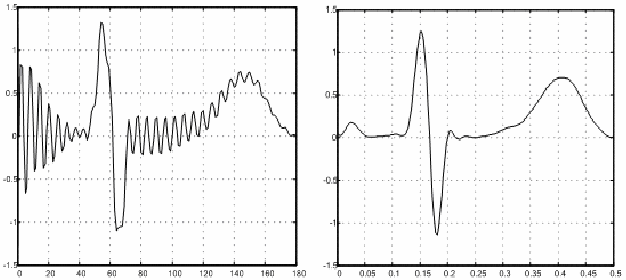

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


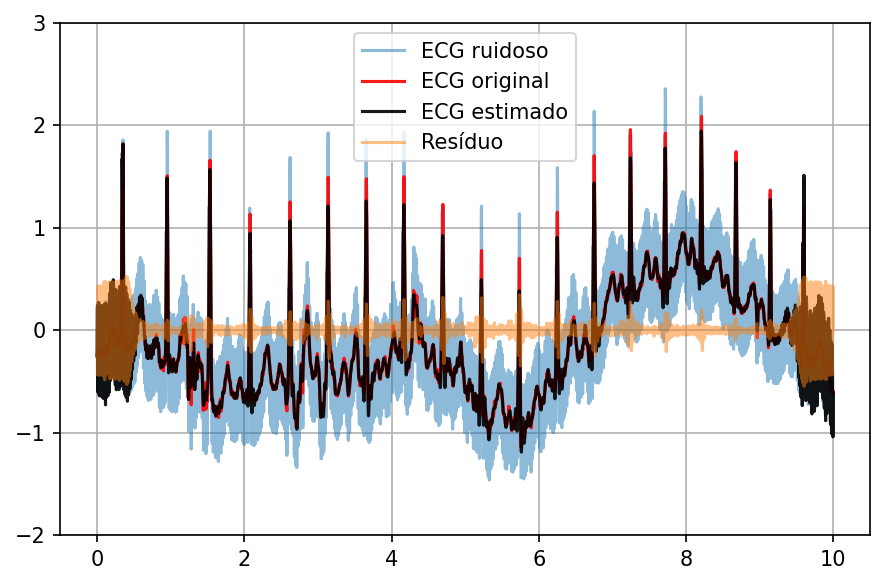

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/chebyshev.py:1670: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


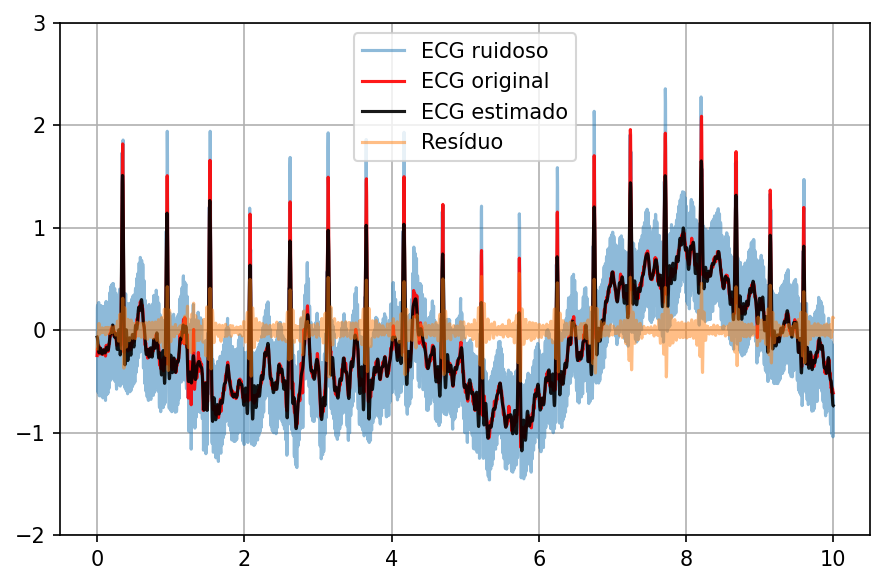

In [26]:
'''
Filtragem de ruído de 60Hz do ECG empregando aproximação por polinômios d Chebyshev
'''

# Função para filtrar o sinal de ECG
def ChebFilter(signal, ord):
    '''
    signal: sinal a ser filtrado
    ord: ordem da série de Chebyshev
    sec_mirror: quantidade de segundos para espalhar nas bordas do sinal
    Fs: taxa de amostragem do sinal
    '''
  
    #Indexa as amostras
    x = np.arange(0, len(signal))

    #Faz o ajuste polinomial
    p = np.polynomial.Chebyshev.fit(x, signal, ord)

    #retorna a aproximação avaliadas nos pontos considerados
    #descantando as amostras inseridas a mais nas bordas
    return p(x)

# Função para filtrar o sinal de ECG, com espelhamento das bordas do sinal
def ChebFilter_w(signal, ord, sec_mirror, Fs):
    '''
    signal: sinal a ser filtrado
    ord: ordem da série de Chebyshev
    sec_mirror: quantidade de segundos para espalhar nas bordas do sinal
    Fs: taxa de amostragem do sinal
    '''
  
    N = len(signal) #comprimento do sinal

    #Amostras adicionas a adicionar no sinal original
    samples_add = sec_mirror * Fs

    #Espelha o sinal nas suas bordas
    #Para evitar um má aproximação nas bordas
    seg_s = signal[0:samples_add]
    seg_e = signal[N - samples_add:N]

    #Concatena o ECG original com as amostras espelhadas
    new_signal = np.concatenate((seg_s[::-1], signal, seg_e[::-1]))

    #Indexa as amostras
    x = np.arange(0, len(new_signal))

    #Faz o ajuste polinomial
    p = np.polynomial.Chebyshev.fit(x, new_signal, ord)

    #retorna a aproximação avaliadas nos pontos considerados
    #descantando as amostras inseridas a mais nas bordas
    return p(x)[samples_add : N + samples_add]


#Importa um sinal de ECG
from scipy.misc import electrocardiogram

#Taxa de amostragem do ECG
Fs = 360

#Sinal de ECG simulado com ruído de 60Hz
sec = 10                            #Toma sec segundos do sinal
x   = np.arange(0, sec + 1/Fs, 1/Fs) #Para indexar o sinal
z   = np.sin(2 * np.pi * 60 * x)     #Cria o ruído de 60Hz
ecg = electrocardiogram()[0:len(x)]  #Trunca o sinal para 5 segundos apenas
y   = ecg + 0.5*z                      #Adiciona o ruído de 60Hz ao sinal original

#Filtrado o sinal de ECG
y_hat = ChebFilter(y, 800)

#Plota os sinais para comparação
plt.figure(dpi=150)
plt.plot(x, y, label='ECG ruidoso', alpha=0.5)
plt.plot(x, ecg, label='ECG original', c='r', alpha=0.9)
plt.plot(x, y_hat, label='ECG estimado', c='k', alpha=0.9)
plt.plot(x, ecg - y_hat, label='Resíduo', alpha=0.5)
plt.ylim([-2, 3])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#Filtrado o sinal de ECG com espelhamento
y_hat = ChebFilter_w(y, 1000, 3, Fs)

#Plota os sinais para comparação
plt.figure(dpi=150)
plt.plot(x, y, label='ECG ruidoso', alpha=0.5)
plt.plot(x, ecg, label='ECG original', c='r', alpha=0.9)
plt.plot(x, y_hat, label='ECG estimado', c='k', alpha=0.9)
plt.plot(x, ecg - y_hat, label='Resíduo', alpha=0.5)
plt.ylim([-2, 3])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


# Referências:

Apostila: http://www.mathcs.emory.edu/~haber/math315/chap4.pdf

Vídeo: https://www.youtube.com/watch?v=TTqfjswpaoQ

Livro: George M. Phillips, Interpolation and Approximation by Polynomials, Springer, 2000.